# MANUAL NET ARCHITECTURE

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import glob
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from PIL import Image

from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [3]:
Mild_Impairment = 'DATASET/TRAIN/Mild_Impairment'
Moderate_Impairment = 'DATASET/TRAIN/Moderate_Impairment'
No_Impairment = 'DATASET/TRAIN/No_Impairment'
Very_Mild_Impairment = 'DATASET/TRAIN/Very_Mild_Impairment'

In [4]:
def plot_images(item_dir, n=6):
    all_item_dir = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dir][:n]
    
    plt.figure(figsize=(80, 40))
    for idx, img_path in enumerate(item_files):
        plt.subplot(3, n, idx+1)
        img = plt.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    
    plt.tight_layout()
    
def image_details_print(data,path):
    print('======== Images in: ', path)
    for key,values in data.items():
        print(key,':\t', values)


def images_details(path):
    files=[f for f in glob.glob(path + "**/*.*", recursive=True)]
    data={}
    data['Images_count']=len(files)
    data['Min_width']=10**100
    data['Max_width']=0
    data['Min_height']=10**100
    data['Max_height']=0
    
    for f in files:
        img=Image.open(f)
        width,height=img.size
        data['Min_width']=min(width,data['Min_width'])
        data['Max_width']=max(width, data['Max_width'])
        data['Min_height']=min(height, data['Min_height'])
        data['Max_height']=max(height, data['Max_height'])
        
    image_details_print(data,path)


TRAINING DATA FOR Mild_Impairment:

======== Images in:  DATASET/TRAIN/Mild_Impairment
Images_count :	 500
Min_width :	 128
Max_width :	 128
Min_height :	 128
Max_height :	 128



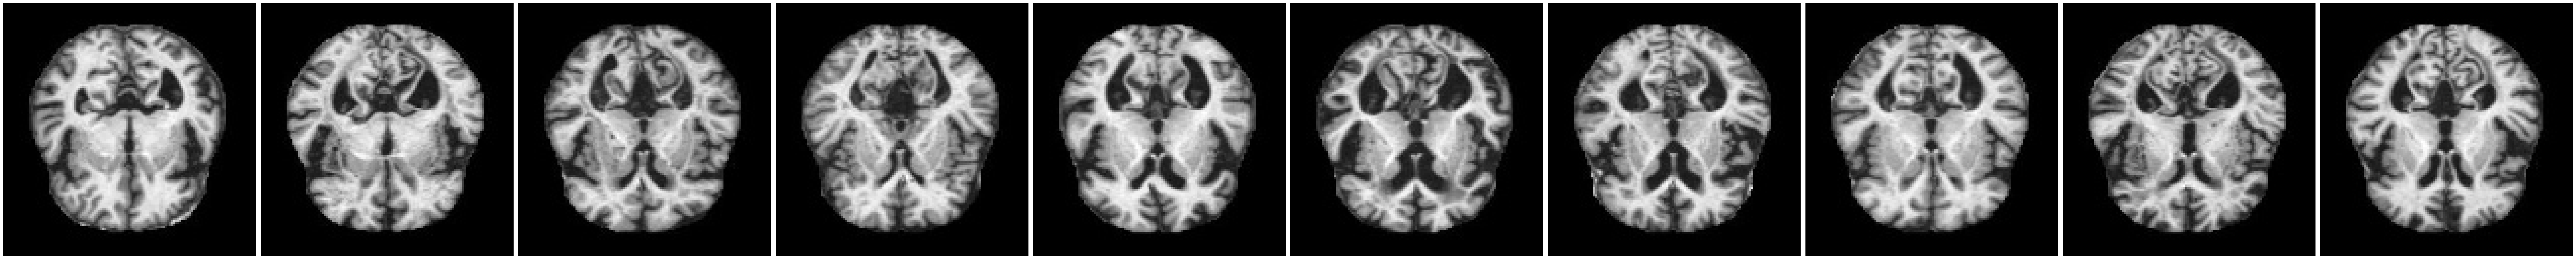

In [5]:
print("")
print("TRAINING DATA FOR Mild_Impairment:")
print("")
images_details(Mild_Impairment)
print("")
plot_images(Mild_Impairment, 10) 


TRAINING DATA FOR Moderate_Impairment:

======== Images in:  DATASET/TRAIN/Moderate_Impairment
Images_count :	 501
Min_width :	 128
Max_width :	 128
Min_height :	 128
Max_height :	 128



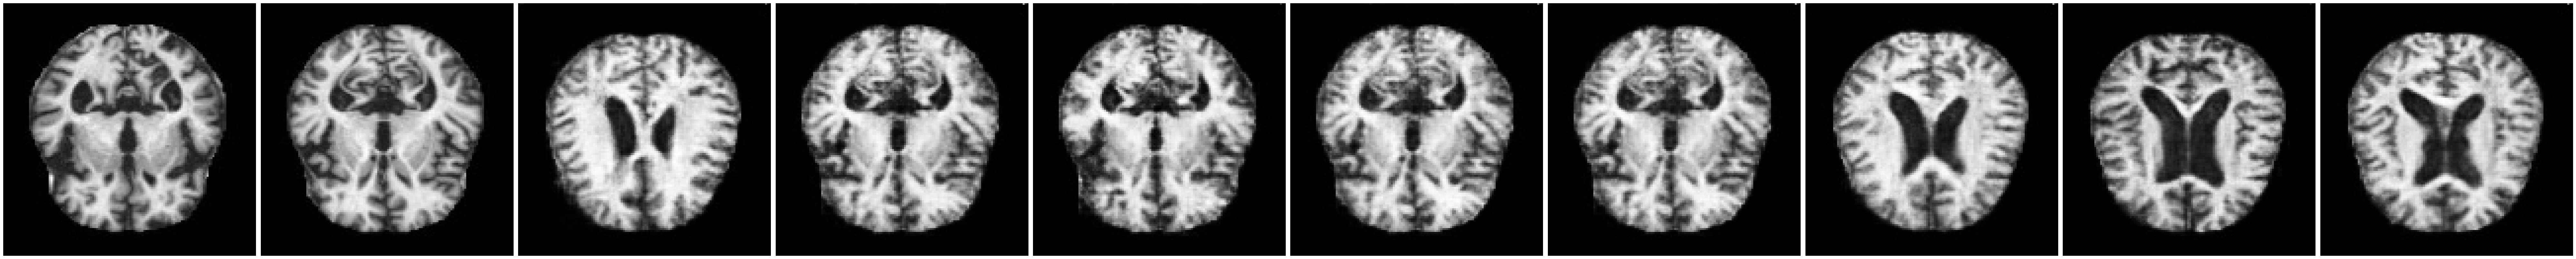

In [16]:
print("")
print("TRAINING DATA FOR Moderate_Impairment:")
print("")
images_details(Moderate_Impairment)
print("")
plot_images(Moderate_Impairment, 10) 


TRAINING DATA FOR No_Impairment:

======== Images in:  DATASET/TRAIN/No_Impairment
Images_count :	 501
Min_width :	 128
Max_width :	 128
Min_height :	 128
Max_height :	 128



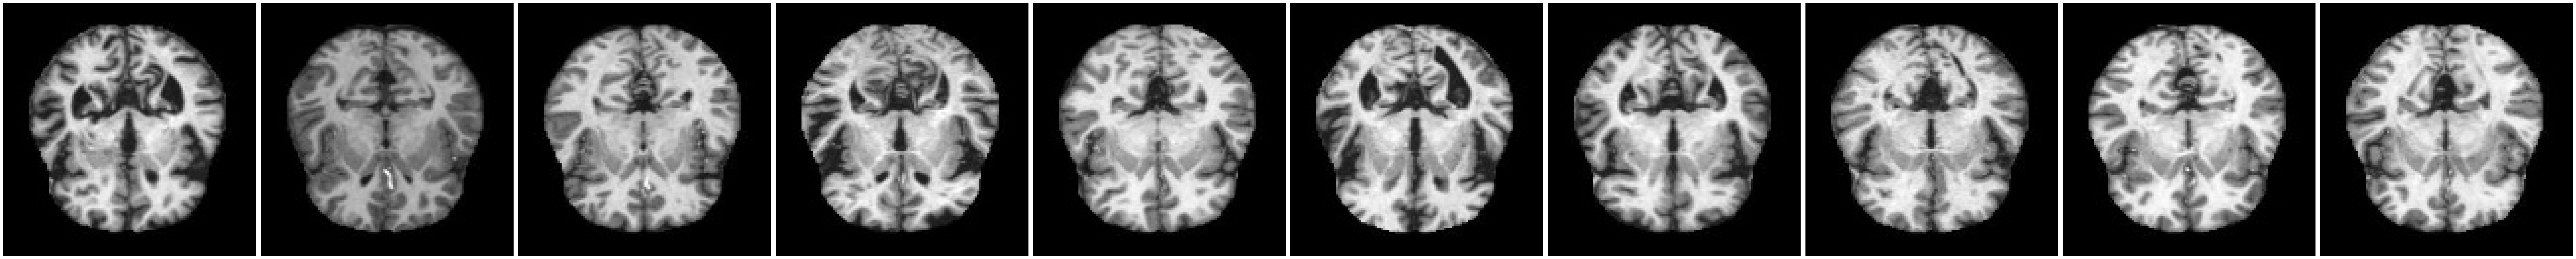

In [6]:
print("")
print("TRAINING DATA FOR No_Impairment:")
print("")
images_details(No_Impairment)
print("")
plot_images(No_Impairment, 10) 


TRAINING DATA FOR Very_Mild_Impairment:

======== Images in:  DATASET/TRAIN/Very_Mild_Impairment
Images_count :	 501
Min_width :	 128
Max_width :	 128
Min_height :	 128
Max_height :	 128



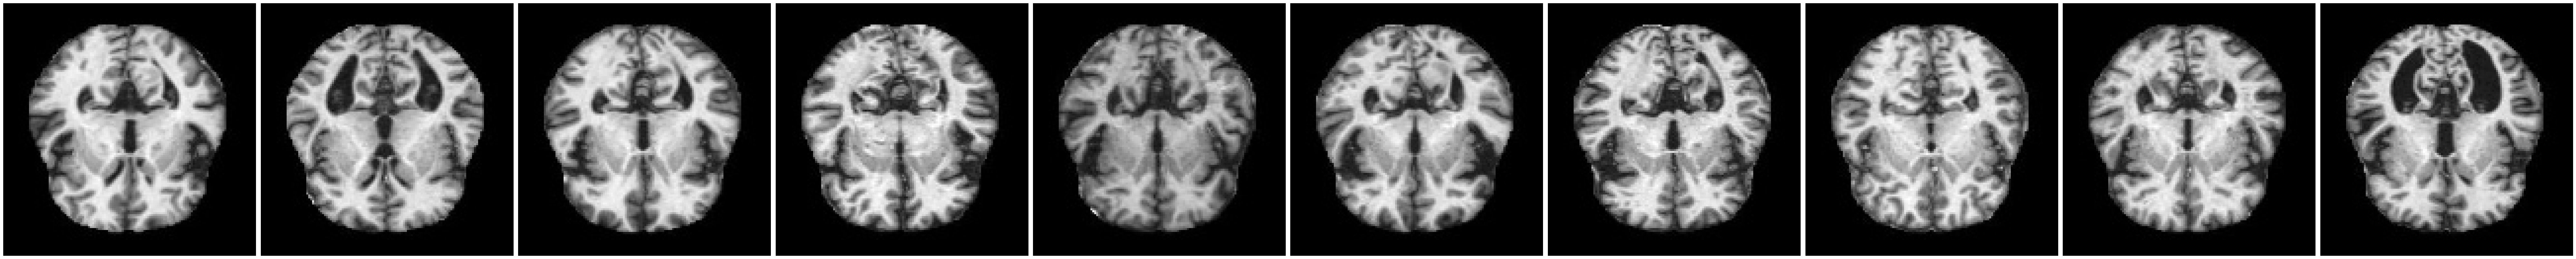

In [7]:
print("")
print("TRAINING DATA FOR Very_Mild_Impairment:")
print("")
images_details(Very_Mild_Impairment)
print("")
plot_images(Very_Mild_Impairment, 10)

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('DATASET/TRAIN',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2003 images belonging to 4 classes.


In [9]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('DATASET/TEST',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 2003 images belonging to 4 classes.


In [10]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(38, activation='relu'))
Classifier.add(Dense(4, activation='softmax'))
Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
model_path = "MANUAL.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [12]:
epochs = 10
batch_size = 512

In [13]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/10


3/3 [==============================] - ETA: 0s - loss: 29.9860 - accuracy: 0.3229
Epoch 1: accuracy improved from -inf to 0.32292, saving model to MANUAL.h5
3/3 [==============================] - 4s 1s/step - loss: 29.9860 - accuracy: 0.3229 - val_loss: 33.7174 - val_accuracy: 0.2396
Epoch 2/10
3/3 [==============================] - ETA: 0s - loss: 17.7404 - accuracy: 0.2604
Epoch 2: accuracy did not improve from 0.32292
3/3 [==============================] - 3s 970ms/step - loss: 17.7404 - accuracy: 0.2604 - val_loss: 6.2007 - val_accuracy: 0.2396
Epoch 3/10
3/3 [==============================] - ETA: 0s - loss: 5.7758 - accuracy: 0.1979
Epoch 3: accuracy did not improve from 0.32292
3/3 [==============================] - 3s 933ms/step - loss: 5.7758 - accuracy: 0.1979 - val_loss: 1.9250 - val_accuracy: 0.2292
Epoch 4/10
3/3 [==============================] - ETA: 0s - loss: 1.8930 - accuracy: 0.2812
Epoch 4: accuracy did not improve from 0.32292
3/3 [====================

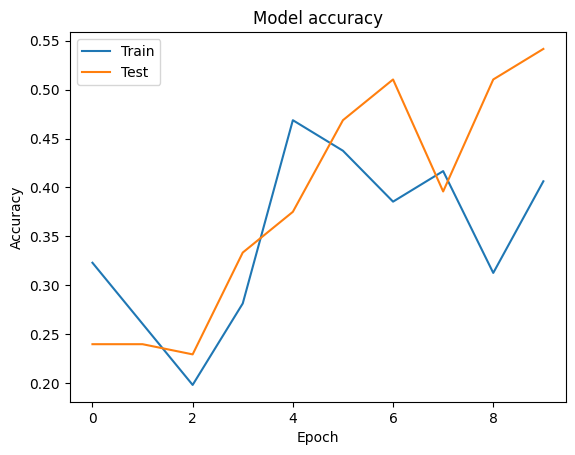

In [14]:
import matplotlib.pyplot as plt

def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

graph()

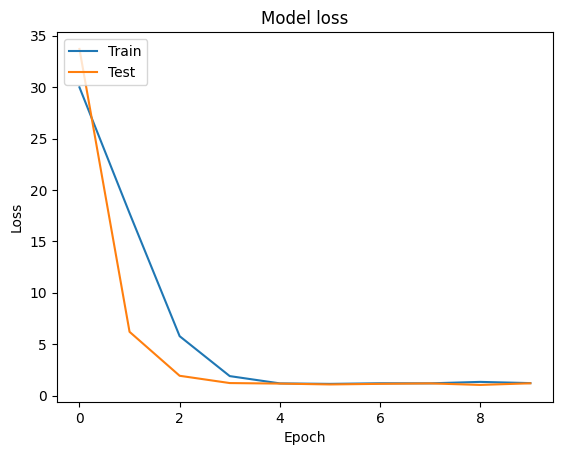

In [15]:
import matplotlib.pyplot as plt

def graph():
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
graph()